In [6]:
import pandas as pd
from ast import literal_eval
%matplotlib inline

### load original training data

In [40]:
ori = pd.read_csv('./users.gender.golden.csv')
ori.shape

(121335, 9)

### remove duplicates

In [41]:
ori = ori[~ori['username'].duplicated()]
ori.shape

(119819, 9)

In [42]:
ori['username'].isnull().sum()

1

In [43]:
ori = ori[~ori['username'].isnull()]
ori.shape

(119818, 9)

In [44]:
ori.head()

,user_id,username,freq,male.prob,fname.gender,male.prob2,fname.gender2,Name,pic.gender
0,5.0,billion,2.0,1.0000,male,0.920000,male,NaN,NaN
1,63.0,paddyshyam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64.0,ArmenSoft,1.0,1.0000,male,NaN,NaN,NaN,NaN
3,128.0,okbookman,1.0,0.9945,male,0.998834,male,NaN,NaN
4,215.0,revitupmedia,1.0,1.0000,male,NaN,NaN,215_profile.jpg,NaN


### keep only valid training data

In [45]:
ori=ori[(~ori['fname.gender'].isnull())][['username','fname.gender', 'male.prob']]
print ori.shape

(48274, 3)


In [46]:
ori=ori[abs(ori['male.prob']-0.5)>0.4][['username','fname.gender']]
print ori.shape
ori.head()

(44812, 2)


,username,fname.gender
0,billion,male
2,ArmenSoft,male
3,okbookman,male
4,revitupmedia,male
7,sakshiinfosys,male


### save cleaned original training data

In [47]:
ori.to_csv('clean_ori_train.csv', index=False)

### load parsed json data

In [50]:
%%time
df0=pd.read_csv('./goden_full_prepared_7.csv')
print df0.shape

(105881, 111)
CPU times: user 1.24 s, sys: 30 ms, total: 1.27 s
Wall time: 1.26 s


### join with original training data

In [61]:
df_01 = ori.set_index('username').join(df0.set_index('username'), how='left').reset_index()
df_01.shape

(44812, 112)

### join with username extract feature data

In [59]:
df_e = pd.read_csv('./preprocessed3.csv')
df_e.shape

(49260, 750)

In [70]:
df_e = df_e[~df_e['username'].duplicated()]

In [71]:
df_e.head()

,username,fname.gender,username_split_predict,last,last2,last3,first,first2,first3,nchar,vowels.pct,digits.pct,last_is_vowel,first_is_vowel,last_is_digit,first_is_digit,digits.num,upper.pct,first_is_upper,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,...,feature_681,feature_682,feature_683,feature_684,feature_685,feature_686,feature_687,feature_688,feature_689,feature_690,feature_691,feature_692,feature_693,feature_694,feature_695,feature_696,feature_697,feature_698,feature_699,feature_700,feature_701,feature_702,feature_703,feature_704,feature_705,feature_706,feature_707,feature_708,feature_709,feature_710,feature_711,feature_712,feature_713,feature_714,feature_715,feature_716,feature_717,feature_718,feature_719,feature_720,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730
0,billion,male,unknow,n,on,ion,b,bi,bil,7,0.428571,0.0,False,False,False,False,0,0,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,7.0
1,ArmenSoft,male,male,t,ft,oft,a,Ar,Arm,9,0.222222,0.0,False,False,False,False,0,2,True,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,9.0
2,okbookman,male,male,n,an,man,o,ok,okb,9,0.444444,0.0,False,True,False,False,0,0,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,9.0
3,revitupmedia,male,unknow,a,ia,dia,r,re,rev,12,0.500000,0.0,True,False,False,False,0,0,False,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,12.0
4,sakshiinfosys,male,male,s,ys,sys,s,sa,sak,13,0.384615,0.0,False,False,False,False,0,0,False,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,24.0,13.0


In [66]:
df_01 = df_01.drop(['fname.gender'], axis=1)

In [73]:
df = df_01.set_index('username').join(df_e.set_index('username'), how='inner').reset_index()
df.shape

(44812, 860)

In [74]:
df.head()

,username,about.chosen_role,about.company,about.display_name,about.hourly_rate,about.primary_language,about.public_name,about.recommendations,about.registration_date,about.role,about.tagline,about.username,about.username_sentence,hourlyRate,resume.show,timeOffset,register_Month,register_Year,desc_len,resume.certifications_len,resume.education_len,resume.exams_len,resume.experience_len,resume.publications_len,skills_len,city_3,country_code_3,country_flag_class_3,country_flag_url_3,country_flag_url_cdn_3,country_highres_flag_url_3,country_highres_flag_url_cdn_3,country_name_3,code_2,country_2,exchange_rate_2,id_2,name_2,sign_2,earnings_score_4,entire_history_all_4,entire_history_category_ratings_communication_4,entire_history_category_ratings_expertise_4,entire_history_category_ratings_hire_again_4,entire_history_category_ratings_professionalism_4,entire_history_category_ratings_quality_4,entire_history_complete_4,entire_history_completion_rate_4,entire_history_incomplete_4,entire_history_incomplete_reviews_4,...,feature_681,feature_682,feature_683,feature_684,feature_685,feature_686,feature_687,feature_688,feature_689,feature_690,feature_691,feature_692,feature_693,feature_694,feature_695,feature_696,feature_697,feature_698,feature_699,feature_700,feature_701,feature_702,feature_703,feature_704,feature_705,feature_706,feature_707,feature_708,feature_709,feature_710,feature_711,feature_712,feature_713,feature_714,feature_715,feature_716,feature_717,feature_718,feature_719,feature_720,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730
0,billion,3,Innovate it,billion,500,id,billion,0,1.076e+09,1,97,billion,Billion,500,False,60.0,February,2004.0,36.0,0.0,0.0,0.0,0.0,0.0,20.0,Lidk&ouml;ping,se,sweden,/img/flags/png/se.png,//cdn2.f-cdn.com/img/flags/png/se.png,/img/flags/highres_png/sweden.png,//cdn6.f-cdn.com/img/flags/highres_png/sweden.png,Sweden,USD,US,1.0,1.0,US Dollar,$,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,7.0
1,ArmenSoft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,9.0
2,okbookman,1,Trumpet Press,okbookman,20,en,okbookman,0,1.07627e+09,0,35,okbookman,Okbookman,20,True,-360.0,February,2004.0,564.0,1.0,1.0,2.0,1.0,0.0,20.0,Lawton,us,united-states,/img/flags/png/us.png,//cdn3.f-cdn.com/img/flags/png/us.png,/img/flags/highres_png/united-states.png,//cdn6.f-cdn.com/img/flags/highres_png/united-...,United States,USD,US,1.0,1.0,US Dollar,$,3.4616,3.0,5.000000,5.000000,5.000000,5.000000,5.000000,3.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,9.0
3,revitupmedia,1,NaN,revitupmedia,35,en,revitupmedia,0,1.07638e+09,0,45,revitupmedia,Revitupmedia,35,False,-300.0,February,2004.0,231.0,0.0,0.0,0.0,0.0,0.0,19.0,Hoboken,us,united-states,/img/flags/png/us.png,//cdn3.f-cdn.com/img/flags/png/us.png,/img/flags/highres_png/united-states.png,//cdn6.f-cdn.com/img/flags/highres_png/united-...,United States,USD,US,1.0,1.0,US Dollar,$,5.3101,37.0,4.906641,4.931357,4.967754,4.931357,4.992470,28.0,0.756757,9.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,12.0
4,sakshiinfosys,3,

male      36794
female     8018
Name: fname.gender, dtype: int64


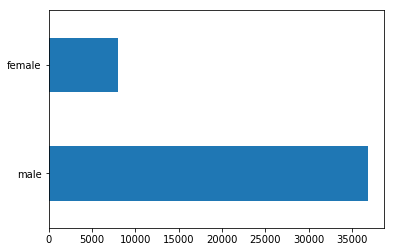

In [56]:
df['fname.gender'].value_counts().plot('barh')
print df['fname.gender'].value_counts()

In [1]:
# from pivottablejs import pivot_ui
# pivot_ui(df.head(100))

#### save joined data

In [76]:
df.to_csv('joined_train.csv', index=False)

## preprocessing training data for model input

### do the same gender predicting on fields similar to username (e.g. public name)
### label encoding

In [78]:
names =['about.username_sentence','about.username', 'about.display_name','about.public_name']

In [81]:
import wordninja
import gender_guesser.detector as gender
d = gender.Detector(case_sensitive=False)

def helper(X):
    tmp = list(map(d.get_gender, X))
    tmp = [i for i in tmp if i!='unknown']
    try:
        tmp[0]
        if len(tmp)>1:
            m=0
            f=0
            for i in tmp:
                if i in ['male','mostly_male','andy']:
                    m+=1
                elif i in ['female','mostly_female']:
                    f+=1
            # change here
            if m>f:
                return 'male'
            else:
                return 'female'
        else:
            if tmp[0] in ['male','mostly_male','andy']:
                    return 'male'
            else:
                return 'female'
    except:
        return 'unknow'

    
    
def pred_spl(col, df=df):
    df['pred_'+col]=df[col].apply(lambda x: ''.join([i for i in str(x) if i.isdigit()==False])).\
    apply(lambda x: wordninja.split(str(x).lower())).apply(helper)


In [82]:
df7=df.copy()

In [84]:
%%time
for i in names:
    pred_spl(i)
df7 = df7.drop(names, axis=1)

CPU times: user 7.33 s, sys: 63 ms, total: 7.39 s
Wall time: 7.36 s


In [85]:
df7.shape

(44812, 856)

#### drop fields of country flag url

In [86]:
df7 = df7.drop(['country_flag_url_3','country_flag_url_cdn_3',\
                'country_highres_flag_url_3','country_highres_flag_url_cdn_3'], axis=1)

### drop fields 95% of null since we did join, the data changed

In [90]:
(df7.isnull()).sum()[(df7.isnull()).sum()>df7.shape[0]*0.95]

summary_rehire_rate_4    43279
dtype: int64

In [91]:
(df7.isnull()).sum()[(df7.isnull()).sum()>df7.shape[0]*0.95].index

Index([u'summary_rehire_rate_4'], dtype='object')

In [92]:
df7 = df7.drop(list((df7.isnull()).sum()[(df7.isnull()).sum()>df7.shape[0]*0.95].index), axis=1)

In [93]:
df7.shape

(44812, 851)

#### preprocess a field with varied length

In [96]:
df7['job_history_job_counts_4'].head()

0                                                   []
1                                                  NaN
2    [{u'count': 1, u'job': {u'category': {u'id': 3...
3    [{u'count': 12, u'job': {u'category': {u'id': ...
4    [{u'count': 17, u'job': {u'category': {u'id': ...
Name: job_history_job_counts_4, dtype: object

In [97]:
df7['job_history_job_counts_4'] = df7['job_history_job_counts_4'].apply(lambda x: len(str(x)))

In [99]:
df7 = df7.reset_index(drop=True)

In [101]:
df8=df7.copy()
df7.select_dtypes(include=['O']).shape

(44812, 49)

### inpute null data

In [123]:
def impute_helper(x):
    try:
        return x.replace('None','0')
    except:
        return x

In [124]:
df8 = df8.fillna(0)

In [128]:
%%time
df8 = df8.applymap(impute_helper)

CPU times: user 38.6 s, sys: 185 ms, total: 38.8 s
Wall time: 38.7 s


In [129]:
df8.select_dtypes(include=['O']).shape

(44812, 49)

In [130]:
df8.select_dtypes(include=['O']).head()

,username,about.chosen_role,about.company,about.hourly_rate,about.primary_language,about.recommendations,about.registration_date,about.role,about.tagline,hourlyRate,resume.show,register_Month,city_3,country_code_3,country_flag_class_3,country_name_3,code_2,country_2,name_2,sign_2,last3months_category_ratings_communication_4,last3months_category_ratings_expertise_4,last3months_category_ratings_hire_again_4,last3months_category_ratings_professionalism_4,last3months_category_ratings_quality_4,last3months_complete_4,last3months_completion_rate_4,last3months_incomplete_4,last3months_on_time_4,summary_completion_rate_4,summary_on_budget_4,summary_on_time_4,deposit_made,email_verified,facebook_connected,identity_verified,payment_verified,phone_verified,profile_complete,country_5,timezone_5,fname.gender,username_split_predict,last,last2,last3,first,first2,first3
0,billion,3,Innovate it,500,id,0,1.076e+09,1,97,500,False,February,Lidk&ouml;ping,se,sweden,Sweden,USD,US,US Dollar,$,0,0,0,0,0,0,0,0,0,0,0,0,True,True,False,False,False,False,True,SE,Europe/Stockholm,male,unknow,n,on,ion,b,bi,bil
1,ArmenSoft,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male,male,t,ft,oft,a,Ar,Arm
2,okbookman,1,Trumpet Press,20,en,0,1.07627e+09,0,35,20,True,February,Lawton,us,united-states,United States,USD,US,US Dollar,$,5,5,5,5,5,1,1,0,1,100%,100%,100%,True,True,False,False,True,True,True,US,America/Denver,male,male,n,an,man,o,ok,okb
3,revitupmedia,1,0,35,en,0,1.07638e+09,0,45,35,False,February,Hoboken,us,united-states,United States,USD,US,US Dollar,$,0,0,0,0,0,0,0,0,0,76%,100%,100%,True,True,False,False,False,False,True,US,America/Chicago,male,unknow,a,ia,dia,r,re,rev
4,sakshiinfosys,3,Sakshi Infoway Pvt Ltd,10,en,0,1.07643e+09,0,35,10,True,February,Rajkot,in,india,India,USD,US,US Dollar,$,0,0,0,0,0,0,0,0,0,98%,98%,100%,True,True,False,False,False,False,True,IN,Asia/Calcutta,male,male,s,ys,sys,s,sa,sak


### save processed data again before encoding

In [136]:
%%time
df8.to_csv('goden_before_encode3.csv', index=False, encoding='utf-8')

CPU times: user 28 s, sys: 52 ms, total: 28 s
Wall time: 28 s


In [137]:
df8.select_dtypes(include=['O']).shape

(44812, 49)

#### ! reload the saved csv, so the program will automately detect the imputed data and treat changed fields as numeric. Since I impute 0, replace 'None' with 0 so they are not treated as string anymore

In [138]:
%%time
df9=pd.read_csv('goden_before_encode3.csv')
print df9.shape

(44812, 851)
CPU times: user 3.18 s, sys: 136 ms, total: 3.31 s
Wall time: 3.37 s


In [139]:
df9.select_dtypes(include=['O']).shape

(44812, 33)

In [140]:
df9.select_dtypes(include=['O']).head()

,username,about.company,about.primary_language,resume.show,register_Month,city_3,country_code_3,country_flag_class_3,country_name_3,code_2,country_2,name_2,sign_2,summary_completion_rate_4,summary_on_budget_4,summary_on_time_4,deposit_made,email_verified,facebook_connected,identity_verified,payment_verified,phone_verified,profile_complete,country_5,timezone_5,fname.gender,username_split_predict,last,last2,last3,first,first2,first3
0,billion,Innovate it,id,False,February,Lidk&ouml;ping,se,sweden,Sweden,USD,US,US Dollar,$,0,0,0,True,True,False,False,False,False,True,SE,Europe/Stockholm,male,unknow,n,on,ion,b,bi,bil
1,ArmenSoft,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,male,male,t,ft,oft,a,Ar,Arm
2,okbookman,Trumpet Press,en,True,February,Lawton,us,united-states,United States,USD,US,US Dollar,$,100%,100%,100%,True,True,False,False,True,True,True,US,America/Denver,male,male,n,an,man,o,ok,okb
3,revitupmedia,0,en,False,February,Hoboken,us,united-states,United States,USD,US,US Dollar,$,76%,100%,100%,True,True,False,False,False,False,True,US,America/Chicago,male,unknow,a,ia,dia,r,re,rev
4,sakshiinfosys,Sakshi Infoway Pvt Ltd,en,True,February,Rajkot,in,india,India,USD,US,US Dollar,$,98%,98%,100%,True,True,False,False,False,False,True,IN,Asia/Calcutta,male,male,s,ys,sys,s,sa,sak
